In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv("/content/bill.csv")

In [59]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      18776 non-null  float64
 1   no      18776 non-null  float64
 2   no2     18776 non-null  float64
 3   o3      18776 non-null  float64
 4   so2     18776 non-null  float64
 5   pm2_5   18776 non-null  float64
 6   pm10    18776 non-null  float64
 7   nh3     18776 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [44]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [43]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           co     no    no2     o3    so2  pm2_5   pm10    nh3
0      False  False  False  False  False  False  False  False
1      False  False  False  False  False  False  False  False
2      False  False  False  False  False  False  False  False
3      False  False  False  False  False  False  False  False
4      False  False  False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...    ...
18771  False  False  False  False  False  False  False  False
18772  False  False  False  False  False  False  False  False
18773  False  False  False  False  False  False  False  False
18774  False  False  False  False  False  False  False  False
18775  False  False  False  False  False  False  False  False

[18776 rows x 8 columns]>

In [45]:
df.shape

(18776, 8)

In [46]:
df.tail()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [60]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [63]:
X=df.drop('Class',axis=1)
Y=df['Class']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

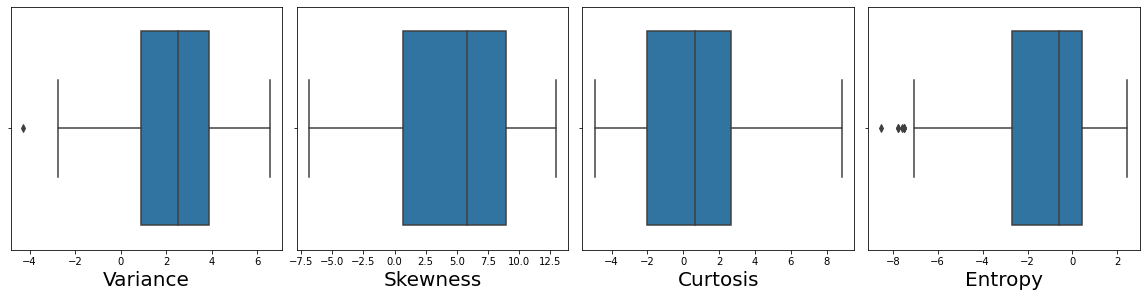

In [64]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [65]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

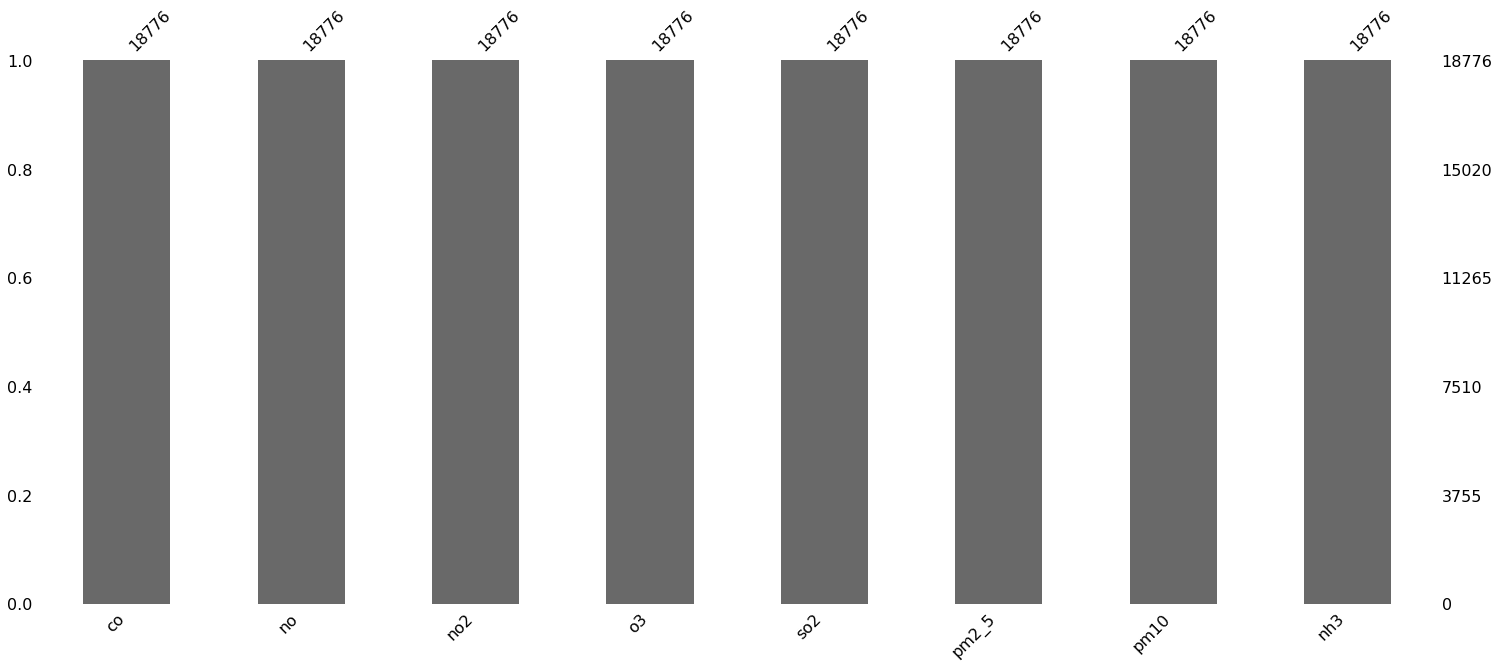

In [51]:
import missingno as mn
mn.bar(df)
plt.show()

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [81]:
a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [82]:
clf=DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [83]:
Y_pred=clf.predict(X_test)

In [84]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[97, 16],
       [16,  1]])

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(Y_test,Y_pred)

0.7538461538461538

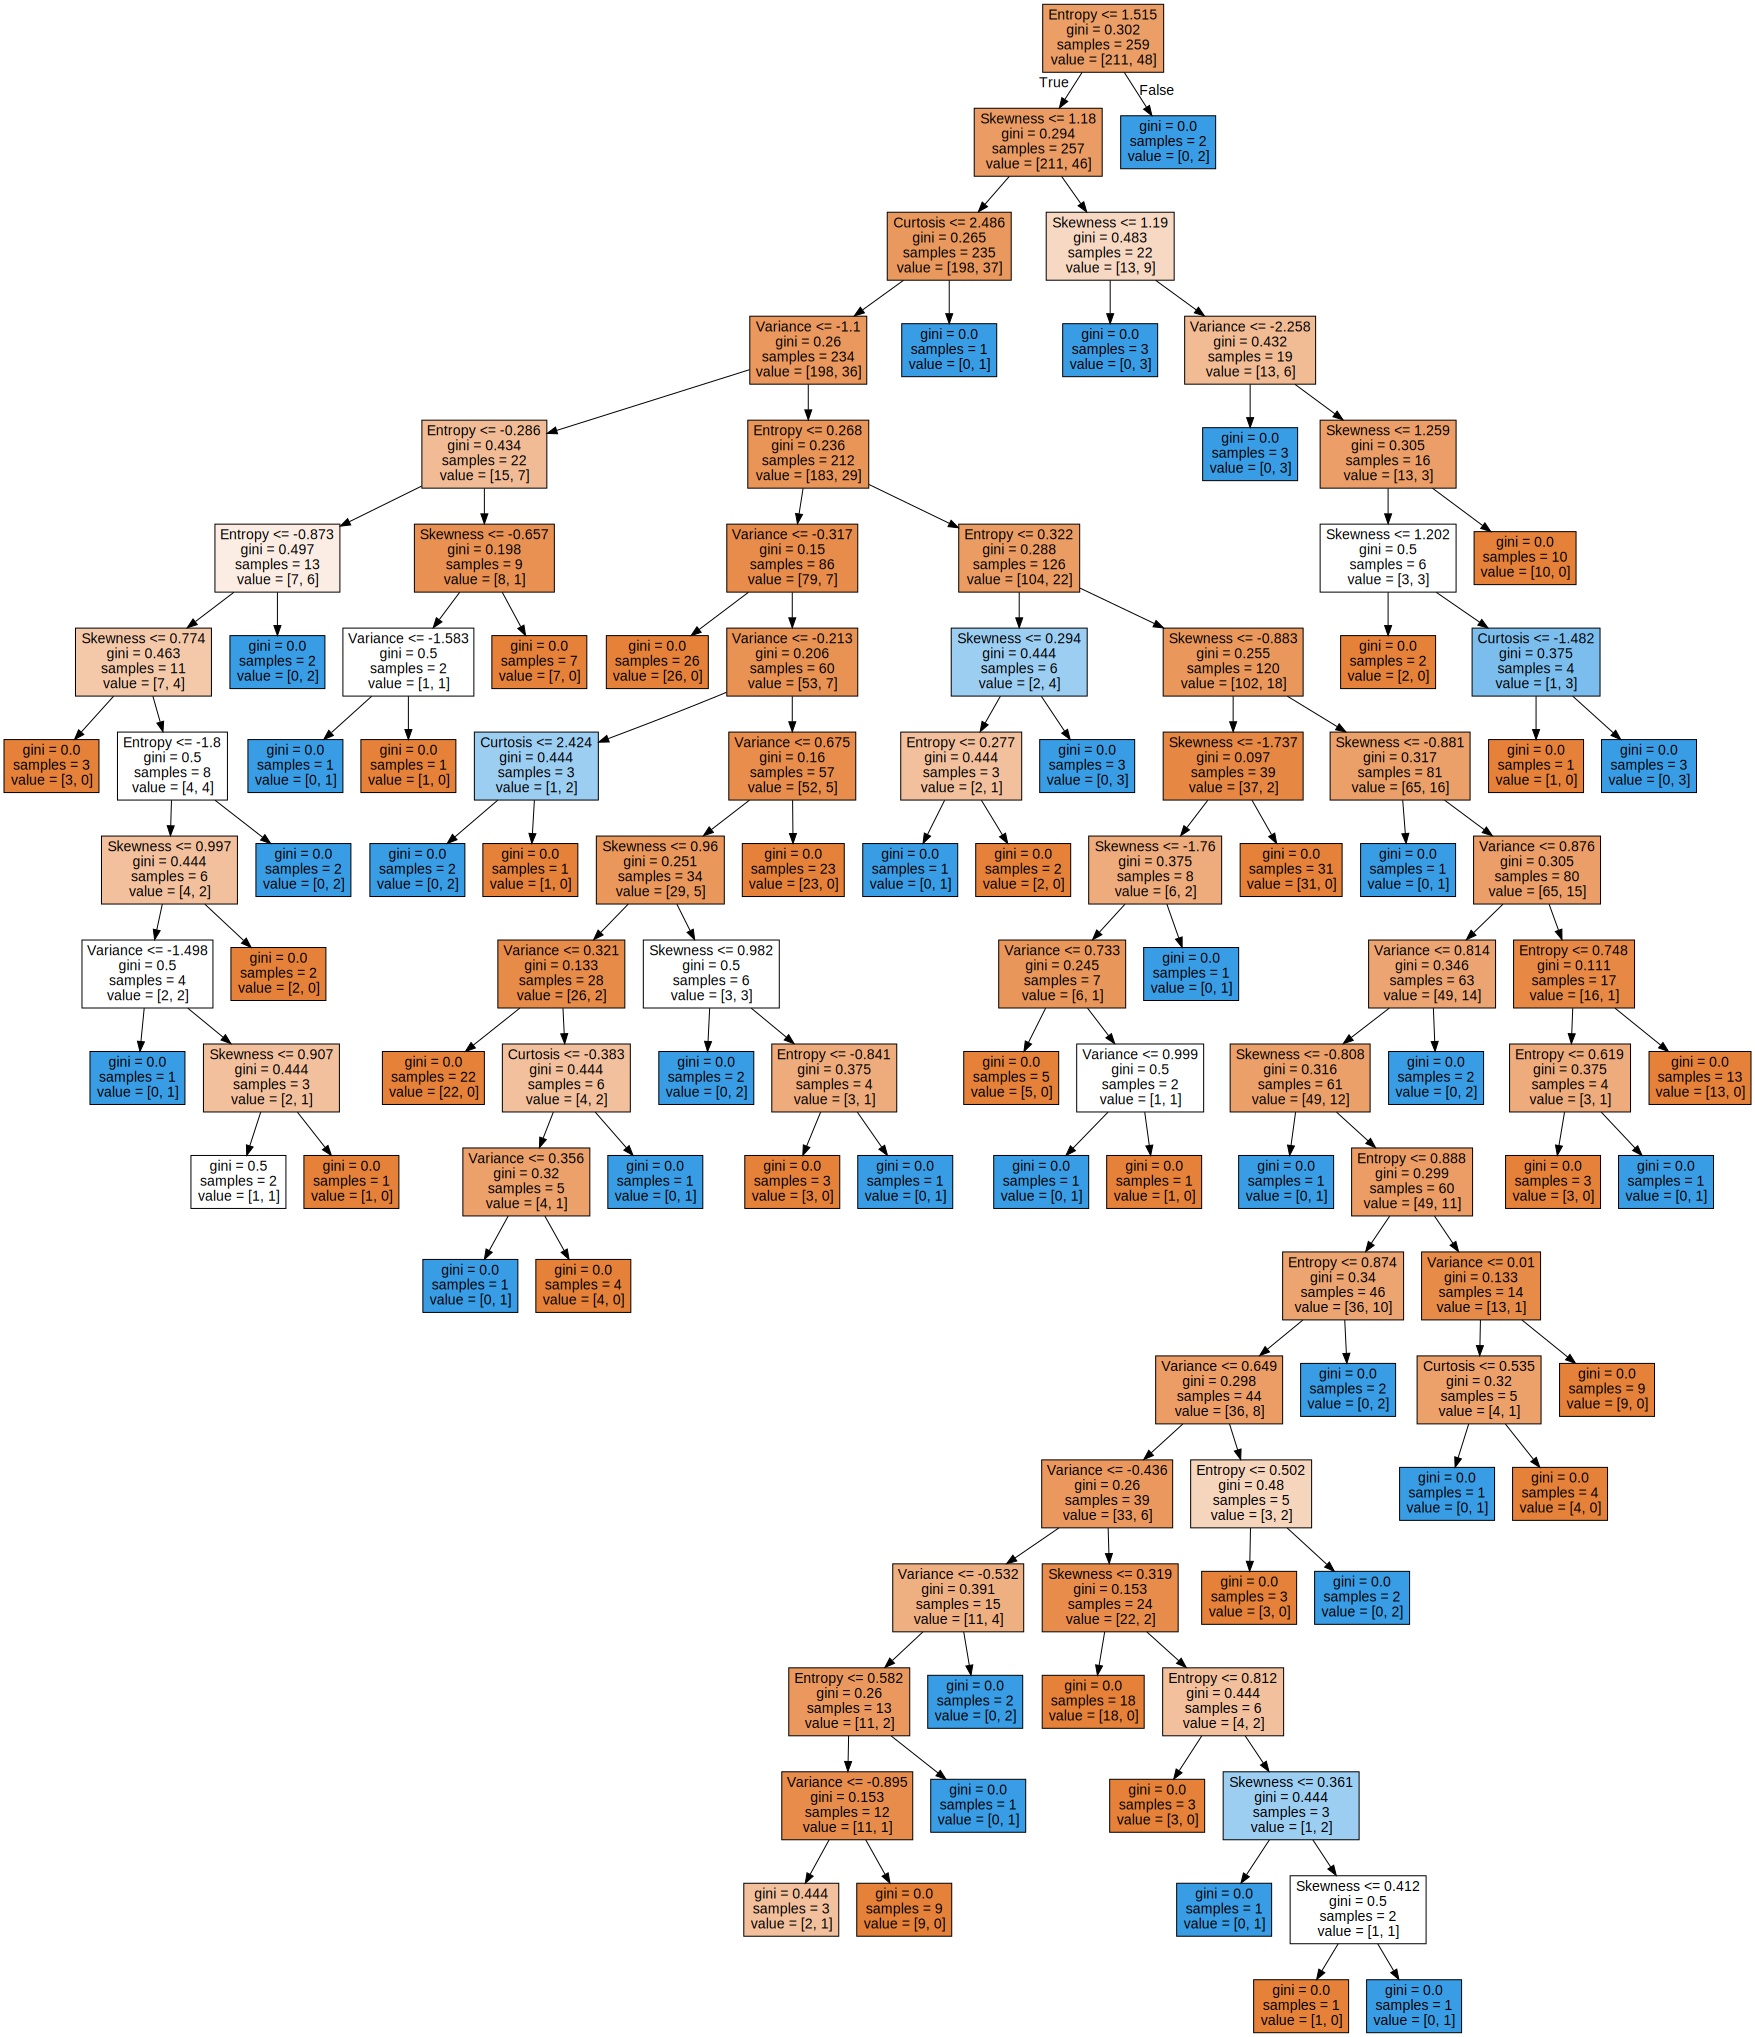

In [73]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

In [74]:
from sklearn.linear_model import LinearRegression
import datetime
from statistics import mean
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [75]:
pred=model.predict(X_test)

In [76]:
Variance=np.var(pred)
Variance

0.0022259461803348602

In [77]:
Sum_of_squared_error=np.mean((np.mean(pred)))
Bias=Sum_of_squared_error-Variance
Bias

0.18105375659863787

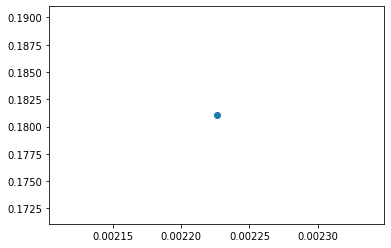

In [78]:
plt.scatter(Variance,Bias)
plt.show()